## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data = pd.merge(study_results, mouse_metadata, on='Mouse ID')
# Display the data table for preview
study_data.head(15)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


In [3]:
# Checking the number of mice.
study_data['Mouse ID'].value_counts().head()

g989    13
m601    10
c282    10
f345    10
l897    10
Name: Mouse ID, dtype: int64

In [15]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
study_data_mice = study_data.set_index('Mouse ID')
mouse = study_data_mice.loc['g989', :]
mouse.head(13)


,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
g989,0,45.000000,0,Propriva,Female,21,26
g989,0,45.000000,0,Propriva,Female,21,26
g989,5,48.786801,0,Propriva,Female,21,26
g989,5,47.570392,0,Propriva,Female,21,26
g989,10,51.745156,0,Propriva,Female,21,26
g989,10,49.880528,0,Propriva,Female,21,26
g989,15,51.325852,1,Propriva,Female,21,26
g989,15,53.442020,0,Propriva,Female,21,26
g989,20,55.326122,1,Propriva,Female,21,26


In [26]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_mice = study_data_mice.drop(index = 'g989')
clean_study_data = clean_data_mice.reset_index()
clean_study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [18]:
# Checking the number of mice in the clean DataFrame.
clean_study_data['Mouse ID'].value_counts().head(10)

m601    10
o926    10
f345    10
l897    10
a897    10
c766    10
w151    10
c758    10
c282    10
i557    10
Name: Mouse ID, dtype: int64

## Summary Statistics

In [32]:
clean_study_data.head()
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
clean_study_data_sort = clean_study_data.sort_values(["Tumor Volume (mm3)"], ascending=True)

clean_study_data_sort.head()



# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
regimen_grouped = clean_study_data_sort.groupby(["Drug Regimen"])
regimen_grouped

regimen_mean = regimen_grouped["Tumor Volume (mm3)"].mean()
regimen_median = regimen_grouped["Tumor Volume (mm3)"].median()
regimen_variance = regimen_grouped["Tumor Volume (mm3)"].var()
regimen_std = regimen_grouped["Tumor Volume (mm3)"].std()
regimen_sem = regimen_grouped["Tumor Volume (mm3)"].sem()


In [41]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = pd.DataFrame({"Mean": regimen_mean, "Median":regimen_median, "Variance":regimen_variance, "Standard Deviation": regimen_std, "SEM": regimen_sem})
# Preview DataFrame

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

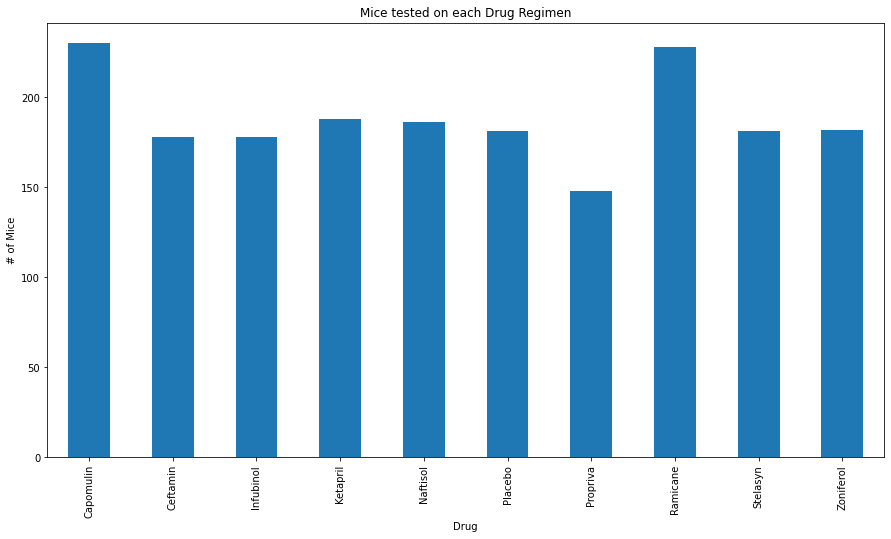

<Figure size 432x288 with 0 Axes>

In [44]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
regimen_data_points = clean_study_data.groupby(["Drug Regimen"]).count()["Mouse ID"]
regimen_data_points

regimen_data_points.plot(kind="bar", figsize=(15,8))
plt.title("Mice tested on each Drug Regimen")
plt.xlabel("Drug")
plt.ylabel("# of Mice")

#show chart and set layout
plt.show()
plt.tight_layout()

In [45]:
regimen_data_points = clean_study_data.groupby(["Drug Regimen"]).count()["Mouse ID"]
regimen_data_points

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

Text(0, 0.5, '# of Mice')

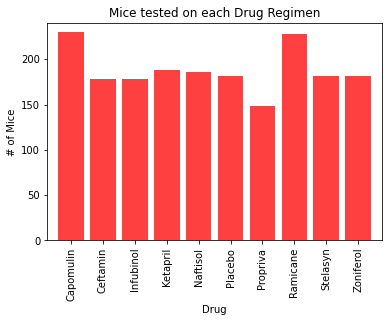

In [46]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

#datapoints
users = [230, 178, 178, 188, 186, 181, 148, 228, 181, 182]

#Set the x_axis to be the amount of the Data Regimen
x_axis = np.arange(len(regimen_data_points))

plt.bar(x_axis, users, color='r', alpha=0.75, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(users)+10)

plt.title("Mice tested on each Drug Regimen")
plt.xlabel("Drug")
plt.ylabel("# of Mice")

In [48]:
groupby_gender = clean_study_data.groupby(["Mouse ID","Sex"])


mouse_gender_df = pd.DataFrame(groupby_gender.size())

#Create the dataframe with total count of Female and Male mice
mouse_gender = pd.DataFrame(mouse_gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

#create and format the percentage of female vs male
mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

#format the "Percentage of Sex" column
mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"]

#gender_df
mouse_gender

,Total Count,Percentage of Sex
Sex,,
Female,123,49.596774
Male,125,50.403226


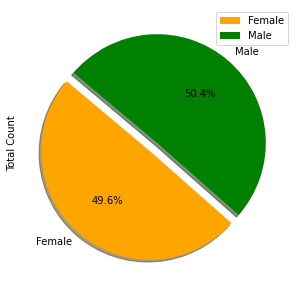

In [52]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#plot = name of the data frame .plot.pie (sumplots true)
colors = ['orange', 'green']
explode = (0.1, 0)
plot = mouse_gender.plot.pie(y='Total Count',figsize=(5,5), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")

(-1.1877265930885335,
 1.1112071628288431,
 -1.1963696973319076,
 1.1123740819715626)

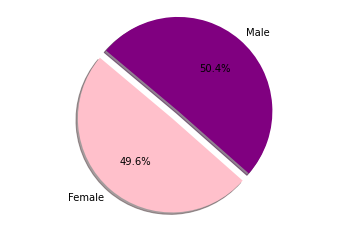

In [53]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female","Male"]
sizes = [49.6,50.4]
colors = ['pink', 'purple']
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [57]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
best_regimes = clean_study_data[clean_study_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
best_regimes = best_regimes.sort_values(["Timepoint"], ascending=True)
best_regimes



best_regimes_data = best_regimes[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

best_regimes_data

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,0,45.000000
1600,Ceftamin,x226,0,45.000000
1475,Ceftamin,x581,0,45.000000
1465,Ceftamin,a275,0,45.000000
1455,Ceftamin,k210,0,45.000000
...,...,...,...,...
1811,Capomulin,g316,45,40.159220
1464,Ceftamin,k210,45,68.923185
460,Ramicane,j913,45,31.560470
1484,Ceftamin,x581,45,64.634949


In [62]:
best_regimens_sort = best_regimes_data.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
best_regimens_sort

Drug Regimen  Timepoint
Capomulin     0            45.000000
              5            45.893720
              10           43.270852
              15           46.539206
              20           30.485985
              25           33.118756
              30           43.013681
              35           36.327870
              40           25.472143
              45           28.430964
Ceftamin      0            45.000000
              5            46.827934
              10           48.015163
              15           47.242929
              20           52.617490
              25           55.810034
              30           54.503001
              35           55.118290
              40           63.469549
              45           64.634949
Infubinol     0            45.000000
              5            48.266204
              10           50.478750
              15           49.159749
              20           54.048608
              25           56.174458
              

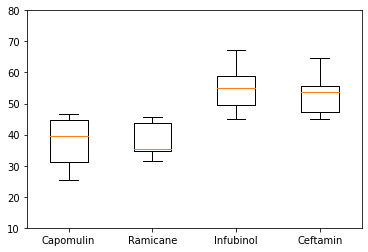

In [63]:
best_regimen_df = best_regimens_sort.to_frame()
best_regimen_df

#Create a list to use as labels and dataframe
top_4 = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_df = best_regimen_df.reset_index()
tumor_lists = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df = tumor_list_df.reindex(top_4)
tumor_vols = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_vols, labels=top_4)
plt.ylim(10, 80)
plt.show()

## Line and Scatter Plots

In [68]:
best_regimes_data

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,0,45.000000
1600,Ceftamin,x226,0,45.000000
1475,Ceftamin,x581,0,45.000000
1465,Ceftamin,a275,0,45.000000
1455,Ceftamin,k210,0,45.000000
...,...,...,...,...
1811,Capomulin,g316,45,40.159220
1464,Ceftamin,k210,45,68.923185
460,Ramicane,j913,45,31.560470
1484,Ceftamin,x581,45,64.634949


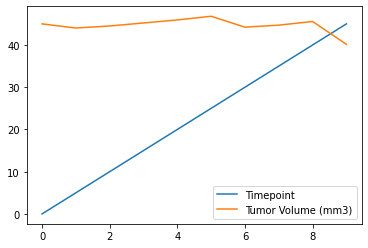

In [65]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
time_vs_tumer = clean_study_data[clean_study_data["Mouse ID"].isin(["g316"])]
time_vs_tumer

time_vs_tumer_data = time_vs_tumer[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
time_vs_tumer_data

line_plot_df = time_vs_tumer_data.reset_index()
line_plot_df

line_plot_final = line_plot_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
line_plot_final

lines = line_plot_final.plot.line()

<AxesSubplot:xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

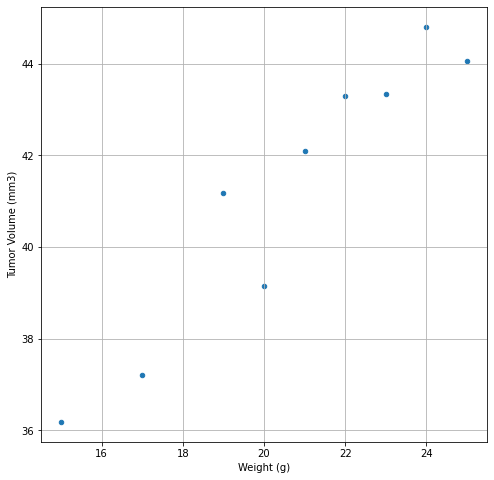

In [79]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_scatter = clean_study_data[clean_study_data["Drug Regimen"].isin(["Capomulin"])]

capomulin_scatter_df = best_regimes[["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]]

capomulin_sorted = capomulin_scatter.sort_values(["Weight (g)"], ascending=True)

capomulin_scatter_plot = capomulin_scatter.reset_index()

capomulin_grouped_weight = capomulin_scatter_plot.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()

capo_grouped_plot = pd.DataFrame(capomulin_grouped_weight).reset_index()

capomulin_scatter = capo_grouped_plot.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', grid = True, figsize= (8,8))
capomulin_scatter

## Correlation and Regression

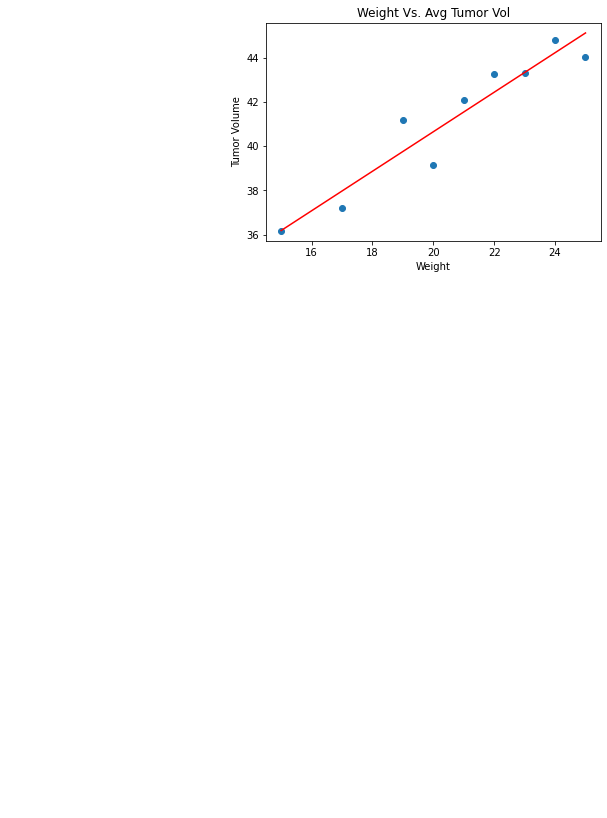

In [80]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = capo_grouped_plot["Weight (g)"]
y_values = capo_grouped_plot["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=10,color="red")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume")
plt.title("Weight Vs. Avg Tumor Vol")
plt.show()